In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import PIL
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import landscape
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch


In [2]:

Black = [(9,9), (8,3)]
    


global_array = [
        [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
        [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
        [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
        [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
        [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
]
        
print('Row:{}'.format(len(global_array)))
print('Col:{}'.format(len(global_array[0])))

# (6,6)
global_array[0][0].append((1, 8)) #0/1/2, num
global_array[0][0].append((2, 11))
global_array[0][0].append((1, 16))

print(global_array[0][0][:])
print(len(global_array[0][0]))



Row:5
Col:10
[0, (1, 8), (2, 11), (1, 16)]
4


In [7]:
# counter = 0 
def output(array, counter):
    
    img = cv2.imread('./samples/Board.png')
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #outside_center_coordinates = (750,750) #44
    white_sequence_number = 2
    black_sequence_number = 1

    total_blackNum = 0
    total_whiteNum = 0

    my_dict = {}
    #center_coordinate = (548, 548)
    #left_top_coordinate = (44, 45)
    Black_board_coordinate = []
    White_board_coordinate = []
   

    for i in range(len(array)): #create dic to store value
        for j in range(len(array[i])):
        
            my_dict[(i, j)] = array[i][j] #0/1/2

            if array[i][j] != 0:
                print("array[i][j] != 0")
                print("global_len", len(global_array[i][j]))

                if len(global_array[i][j]) == 1:
                    print("global len == 1")
                    counter = counter + 1
                    print("counter: ", counter)

                    global_array[i][j].append((array[i][j], counter))

                else:
                    #print(global_array[i][j][-1][0])
                    if global_array[i][j][-1][0] != array[i][j]:
                        counter = counter + 1
                        global_array[i][j].append((array[i][j], counter))

    for key, value in my_dict.items(): #checking 0 / 1 / 2
        if value == 1:
            # counter += 1
            #print("value == 1")
            if key not in exit_black_array:
                #if key not in exit_white_array:
                Black.append(key)
                exit_black_array.append(key)
                #else:
                    #eaten_peice.append()
            #print("added")
            #print("exit: ", exit_black_array)

        elif value == 2:
            if key not in exit_black_array:
                White.append(key)
                exit_black_array.append(key)
            #print("added")
            #print("exit: ", exit_black_array)

    for item in Black:
        if item not in exit_white_array:
            exit_white_array.append(item)

    #print("Black -sorted", Black)
    #print("Black_array: ", Black) # return the location of black peices
    #print("White_array: ", White) # return the location of white peices
#=========================== Checking eaten peices =======================
    #if 
#==========================================================================
    #changing the location into actual board coordinate
    for i in range(len(Black)):
        Black_board_coordinate.append((int(44+board_ratio * Black[i][1]) , int(44+board_ratio * Black[i][0])))
        #print("board coordinate: ", Black_board_coordinate)
        #img = cv2.circle(img, Black_board_coordinate, radius, (0, 0, 0), thinkness)
        total_blackNum += 1

    for i in range(len(White)):
        White_board_coordinate.append((int(44+board_ratio * White[i][1]) , int(44+board_ratio * White[i][0])))
        #img = cv2.circle(img, White_board_coordinate, radius, (255, 255, 255), thinkness)
        total_whiteNum += 1

    print("黑棋總數量: ", total_blackNum)
    print("白棋總數量: ", total_whiteNum)

#===========================================================================

#========== Draw ===============
    for i in range(len(Black_board_coordinate)): #draw black

        #print(Black_board_coordinate[i][0])
        img = cv2.circle(img, (Black_board_coordinate[i][0], Black_board_coordinate[i][1]), radius, (0, 0, 0), thinkness) #center
        
    for i in range(len(White_board_coordinate)): #draw white

        img = cv2.circle(img, (White_board_coordinate[i][0], White_board_coordinate[i][1]), radius, (250, 250, 250), thinkness) #center
        img = cv2.circle(img, White_board_coordinate[i], radius, (0, 0, 0), 2)

    for i in range(len(Black_board_coordinate)): #black number
        coordinate = (Black_board_coordinate[i][0]-14 , Black_board_coordinate[i][1] + 15),
        fontScale = 1.4
        if black_sequence_number >= 10:
            fontScale = 1.1
            coordinate = (Black_board_coordinate[i][0]-24 , Black_board_coordinate[i][1] + 12),
        img = cv2.putText(img, str(black_sequence_number), coordinate[0], fontFace, fontScale, (250,250,250), number_thinkness, lineType)
        black_sequence_number += 2

    for i in range(len(White_board_coordinate)): #white number
        coordinate = (White_board_coordinate[i][0]-14 , White_board_coordinate[i][1] + 15),
        fontScale = 1.4
        if white_sequence_number >= 10:
            fontScale = 1.1
            coordinate = (White_board_coordinate[i][0]-24 , White_board_coordinate[i][1] + 12),
        img = cv2.putText(img, str(white_sequence_number), coordinate[0], fontFace, fontScale, (0,0,0), number_thinkness, lineType)
        white_sequence_number += 2
#=================================
    cv2.imwrite('output.png', img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.show()  

    return counter



    

array[i][j] != 0
global_len 1
global len == 1
counter:  1
黑棋總數量:  1
白棋總數量:  0


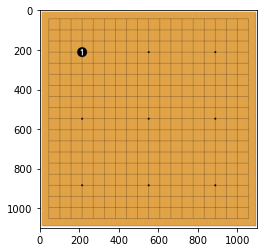

array[i][j] != 0
global_len 1
global len == 1
counter:  2
array[i][j] != 0
global_len 2
黑棋總數量:  1
白棋總數量:  1


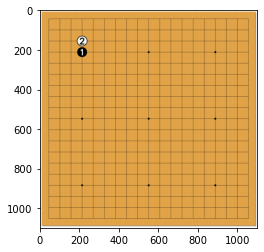

array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 1
global len == 1
counter:  3
array[i][j] != 0
global_len 2
黑棋總數量:  2
白棋總數量:  1


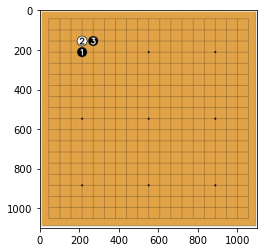

array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 1
global len == 1
counter:  4
黑棋總數量:  2
白棋總數量:  2


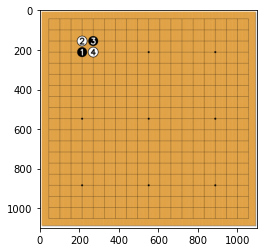

array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 1
global len == 1
counter:  5
黑棋總數量:  3
白棋總數量:  2


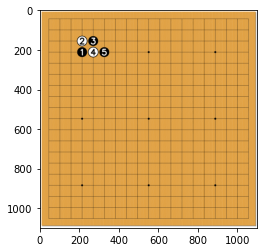

array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 1
global len == 1
counter:  6
黑棋總數量:  3
白棋總數量:  3


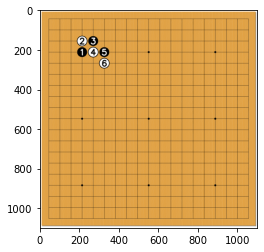

array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 2
array[i][j] != 0
global_len 1
global len == 1
counter:  8
array[i][j] != 0
global_len 1
global len == 1
counter:  9
array[i][j] != 0
global_len 2
黑棋總數量:  4
白棋總數量:  4


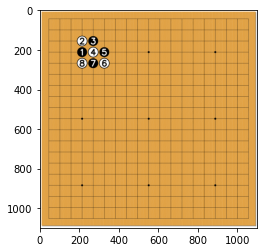

In [8]:
exit_black_array = []
exit_white_array = []
White = []
Black = []
global_array = [[[0 for col in range(1)] for col in range(19)] for row in range(19)]

radius =25
thinkness = -1

board_ratio = 56

fontFace = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 1.5
number_thinkness = 3
space_coordinate = 10
lineType = cv2.LINE_AA

counter = 0
array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

counter = output(array, 0)

#print(counter)
array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

counter = output(array, counter)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

counter = output(array, counter)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

counter = output(array, counter)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

counter = output(array, counter)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

counter = output(array, counter)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
counter = output(array, counter)

#print(global_array)








In [9]:
def create_certificate(filename, path, player_name1, player_name2, result, img, img2):
    # Set up the canvas object
    c = canvas.Canvas(os.path.join(path, filename), pagesize=A4)
    
    # Add the basic information in the middle of the page
    # c.setFontSize(12)
    # c.drawCentredString(A4[0] / 2, 800, f"Black:{player_name1} vs. White: {player_name2}")
    # c.setFontSize(10)
    # c.drawCentredString(A4[0] / 2, 780, result)
    
    # Draw the image in the center of the page
    #c.drawImage(img, 18, 200, 560, 560)
    
    img2 = cv2.imread(img2)
    # add the eaten pieces case
    for i in range (len(global_array)):
        for j in range (len(global_array[i])):
            if (len(global_array[i][j])) > 2: # only one pieces 
                for p in range (2, len(global_array[i][j])):
                    type = global_array[i][j][p][0]
                    cur_num = global_array[i][j][p][1]
                    if type == 1: #black case
                        img2 = cv2.circle(img2, (200, 500), radius, (0, 0, 0), thinkness) #center
                        img2 = cv2.putText(img2, str(cur_num), (200,500), fontFace, fontScale, (250,250,250), number_thinkness, lineType)
                        #space_coordinate += 20
                    else: # white case
                        img2 = cv2.circle(img2, (50, 500), radius, (250, 250, 250), thinkness) #center
                        img2 = cv2.circle(img2, 200, radius, (0, 0, 0), 2)
                        img2 = cv2.putText(img2, str(cur_num), (200,500), fontFace, fontScale, (0,0,0), number_thinkness, lineType)
                        #space_coordinate += 20

    cv2.imwrite('Board.png', img2)
    c.drawImage("Board.png", 18, 200, 560, 560)

    # Save and close the PDF file
    c.save()

In [11]:
filename = "GO_4_16.pdf"
path = "E:\Youtube music"
player_name1 = "Zackery"
player_name2 = "Bob"
result = "Winner: Zackery"
img = "E:\python_test\GO\go_game_extension-main (2)\go_game_extension-main\output.png"
img2 = "E:\python_test\GO\go_game_extension-main (2)\go_game_extension-main\TEST.png"
create_certificate(filename, path, player_name1, player_name2, result, img, img2)
